# DARPA MSIT Analysis | State-Space Analysis

### Run State-Space Model
### *NOTE: Update this section with the most recent script from AY*

The MSIT state space model is as follows:

$$
RT(k) = \beta_0 + \beta_1 * Interference + X_{ss}(k)
$$
where
$$
X_{ss}(k) = X_{ss}(k - 1) + W
$$

Interference is 1 if the current trial k is an incongruent trial and 0 if it is a congruent trial.

### Visualize Results of State-Space Model

[[  9.87566880e-01   9.37942993e-02]
 [  9.87724458e-01   9.46790776e-02]
 [  9.87882037e-01   9.17869680e-02]
 [  9.87932460e-01   8.79146759e-02]
 [  9.87982883e-01   8.01529853e-02]
 [  9.88033306e-01   7.20358154e-02]
 [  9.88083728e-01   6.42631801e-02]
 [  9.88134151e-01   5.61289082e-02]
 [  9.88448732e-01   5.04109584e-02]
 [  9.88921825e-01   4.61429610e-02]
 [  9.89394917e-01   3.97026623e-02]
 [  9.89868010e-01   3.57367072e-02]
 [  9.90330664e-01   3.16752630e-02]
 [  9.90793317e-01   2.92479932e-02]
 [  9.91190543e-01   2.62222383e-02]
 [  9.91606603e-01   2.33687655e-02]
 [  9.92022664e-01   2.01016808e-02]
 [  9.92533530e-01   1.77018183e-02]
 [  9.92859176e-01   1.36076910e-02]
 [  9.93184822e-01   8.40689040e-03]
 [  9.93510468e-01   6.48215381e-03]
 [  9.93836114e-01   5.83636559e-03]
 [  9.94228151e-01   5.79786704e-03]
 [  9.94798579e-01   7.39116618e-03]
 [  9.95369007e-01   7.09225578e-03]
 [  9.95939435e-01   7.83296287e-03]
 [  9.96509863e-01   9.93836473e-03]
 

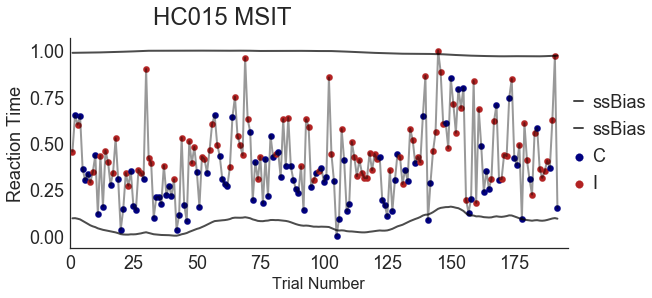

In [6]:
from scipy.io import savemat
from scipy.stats import probplot
import os
import numpy as np
import pylab as plt
import seaborn as sns
from pandas import read_csv
from scipy.io import loadmat
import pandas as pd
sns.set_style('white')
sns.set_context('paper', font_scale=2.25)

SUBJ_LIST = ['hc015']
    
for SUBJ in SUBJ_LIST:

    subject = '%s' % SUBJ
    behavior_dir = '/Users/emilyhahn/projects/msit/behavior/'

    fig = plt.figure(figsize=(12,4))
    mat = loadmat('/Users/emilyhahn/projects/msit/behavior_preproc/completed/%s_msit_ss.mat' % subject)
    
#     print(mat['Interference'])
#     print(mat['Accuracy'])
#     print(mat['Trial'])
#     print(mat['RT'])
#     print(mat['XSmt'])

    ## Define functions
    def normalize(arr): return (arr - arr.min()) / (arr.max() - arr.min())
    
    ## Assemble state space regressors.
    ss_outputs = np.expand_dims(np.array([np.concatenate(arr) for arr in mat['XSmt']]).squeeze(),1)

    rt = mat['RT'].squeeze()
    rt = normalize(rt)
    ss = ss_outputs.squeeze()
    ss = normalize(ss)
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Plot timeseries of reaction times.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Initialize plot.
    ax = plt.subplot2grid((1,4),(0,1),colspan=3)    
    colors = np.where(mat['Interference'].squeeze(), 'firebrick', 'navy')
    markers = np.where(mat['Accuracy'],'o','s').squeeze()

    ## Plot lines/scatter points.
    ax.plot(mat['Trial'].squeeze(), rt, color='k', linewidth=2, alpha=0.4)
    for x,y,c,m in zip(mat['Trial'].squeeze(), rt, colors, markers): 
        ax.scatter(x,y,s=40,marker=m,color=c)
    for color, label in zip(['navy', 'firebrick'], ['C','I']): 
        ax.scatter([],[], s=60, color=color, label=label)

    ## Add flourishes.
    ax.set_xlim(0,196)
    ax.set_xlabel('Trial Number', fontsize=16)
    ax.set_ylabel('Reaction Time', fontsize=18)

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Plot state space regressor.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Plot state-space.
    # Integrate (xm-2*sqrt(xb) re: compass_plot_bound
    ax.plot(mat['Trial'].squeeze(), ss, linewidth=2, color='k', label='ssBias', alpha=0.7)
    
    ## Add flourishes.
    ax.legend(loc=7, bbox_to_anchor=(1.175,0.5), frameon=False, borderpad=0, handlelength=0.5, handletextpad=0.5)

    sns.despine()
    plt.suptitle('%s MSIT' %subject.upper(), y=0.99, fontsize=24)
    plt.subplots_adjust(left=0.1,right=0.9,bottom=0.15, wspace=0.75)
    plt.show()
#     f = '/autofs/space/lilli_001/users/DARPA-Scripts/tutorials/darpa_msit_ecr_pipeline/plots/behavior/%s_msit_behavior.png' %subject
#     plt.savefig(f, dpi=160)

## Generate Nuisance Regressors
### *Note: Update this section with the mc script used with the I-C analyses*
This section creates custom nuisance regressors for use in the first-level analysis. Specifically, the script creates (1) demeaned, detrended, and orthogonalized motion regressors that explain 90% of the variance in the motion; and (2) the timepoints to censor based on functional displacement (FD; Power et al. 2012, 2014) values. Users will specify which FD thresholds to use to create subject-specific timepoint censoring files to be used in the first level analyses. 

## Decide on Censor Level
### *Note: Update this section with the mc script used with the I-C analyses*
This section will create a summary file for specified subjects and FD thresholds describing how many volumes (acquisitions) will be censored if the user chooses a specific FD threshold. The summary file is written to the fMRI folder.

## Beta Series Analysis
### *Note: Incorperate output of nuisance + censor values in this step*

## Joint probability distribution
This section visualizes ROI timeseries betas x SS variables